In [51]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.getcwd() + '/core')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
model = 'LR(E)'
opt = config.VAE_cifar10

print(model)
indist_ = np.load(f'./npy/{model}/{opt.train_dist}_{opt.train_dist}.npy')
for ood in opt.ood_list:
    ood_ = np.load(f'./npy/{model}/{opt.train_dist}_{ood}.npy')
    ood_[ood_ > 1e+30] = 1e+30
    ood_[ood_ < -1e+30] = -1e+30
    combined = np.concatenate((indist_, ood_))
    label_1 = np.ones(len(indist_))
    label_2 = np.zeros(len(ood_))
    label = np.concatenate((label_1, label_2))
    fpr, tpr, thresholds = metrics.roc_curve(label, combined, pos_label=0)
    aucroc = metrics.auc(fpr, tpr)
    print(ood, aucroc)

LRatio
cifar10 0.5
svhn 0.05028092
celeba 0.33277602
lsun 0.57633418
mnist 0.82516032
fmnist 0.78262382
kmnist 0.84262064
omniglot 0.9608017799999999
notmnist 0.50587268
noise 1.0
constant 0.22321902
overall 0.60989436


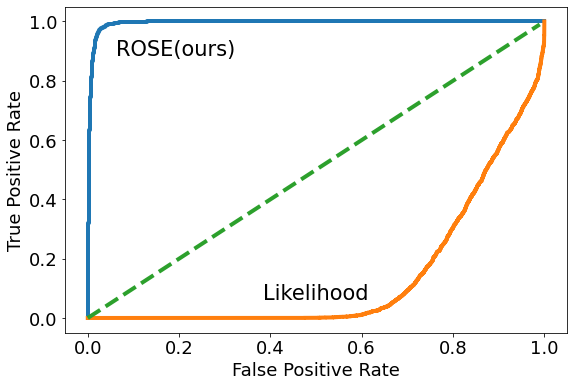

0.99457324 0.13800048


In [41]:
model = 'VAE'
opt = config.VAE_fmnist
ood = 'mnist'


for method in ['ekfac(max)']:
    # ROSE -> AUROC
    indist_ = np.load(f'./npy/ROSE/{model}_{opt.train_dist}/{opt.train_dist}_{opt.train_dist}_{method}.npy')
    ood_ = np.load(f'./npy/ROSE/{model}_{opt.train_dist}/{opt.train_dist}_{ood}_{method}.npy')
    combined = np.concatenate((indist_, ood_))
    label_1 = np.ones(len(indist_))
    label_2 = np.zeros(len(ood_))
    label = np.concatenate((label_1, label_2))
    fpr1, tpr1, thresholds1 = metrics.roc_curve(label, combined, pos_label=0)
    aucroc1 = metrics.auc(fpr1, tpr1)
    # VAE NLL -> AUROC
    indist_ = np.load(f'./npy/VAE_NLL/{opt.train_dist}_{opt.train_dist}_nll.npy')
    ood_ = np.load(f'./npy/VAE_NLL/{opt.train_dist}_{ood}_nll.npy')
    combined = np.concatenate((indist_, ood_))
    label_1 = np.ones(len(indist_))
    label_2 = np.zeros(len(ood_))
    label = np.concatenate((label_1, label_2))
    fpr2, tpr2, thresholds2 = metrics.roc_curve(label, combined, pos_label=0)
    aucroc2 = metrics.auc(fpr2, tpr2)
    
    # Plot ROC
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111)
    
    p1, = ax.plot(fpr1, tpr1, label='ROSE', linewidth=4)
    p2, = ax.plot(fpr2, tpr2, label='Likelihood', linewidth=4)
    ax.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), linestyle='--', linewidth=4)
    
    ax.grid(False)
    ax.set_xlabel('False Positive Rate', fontsize=18)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_ylabel('True Positive Rate', fontsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    # text
    textstr = 'ROSE(ours)'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.0)
    ax.text(0.22, 0.9, textstr, transform=ax.transAxes, fontsize=21,
            verticalalignment='top', bbox=props, ha='center')
    textstr = 'Likelihood'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.0)
    ax.text(0.5, 0.15, textstr, transform=ax.transAxes, fontsize=21,
            verticalalignment='top', bbox=props, ha='center')
    
    #plt.legend(handles=[p1, p2], loc='lower right')
    fig.savefig(f'./images/auroc/auroc_{model}_{opt.train_dist}_{ood}_{method}.png', dpi=400)
    plt.show()
    print(aucroc1, aucroc2)
        
